<a href="https://colab.research.google.com/github/StuckInAnEndlessFebruary/Image_processing_homework/blob/main/Image_processing_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# سوال 1

## مرحله ۱: اتصال به Google Drive و آماده‌سازی مسیرها

In [3]:
from google.colab import drive
import os

# اتصال به گوگل درایو
drive.mount('/content/drive')

# مسیر پوشه تصاویر
image_dir = '/content/drive/MyDrive/cv/Q1/'

# بررسی فایل‌ها
os.listdir(image_dir)


Mounted at /content/drive


['processed_img_part_2.jpg',
 'processed_img_part_3_Level_0.jpg',
 'processed_img_part_3_Level_1.jpg',
 'processed_img_part_3_Level_2.jpg',
 'processed_img_part_3_Level_3.jpg',
 'processed_img_part_3_Level_4.jpg',
 'processed_img_part_4.jpg',
 'processed_img_part_1.jpg',
 'denoised_img_part_1.jpg',
 'denoised_img_part_2.jpg',
 'img_part_1.jpg',
 'img_part_3.jpg',
 'img_part_2.jpg',
 'final_corrected_part_4.jpg',
 'restored_monalisa.jpg']

## مرحله ۲: نمایش اولیه تصاویر برای تحلیل نوع آسیب

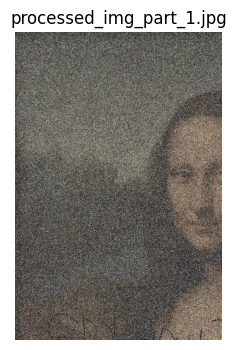

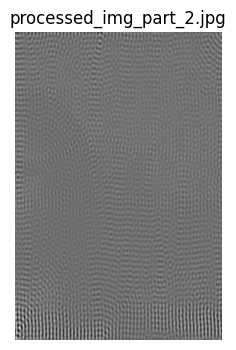

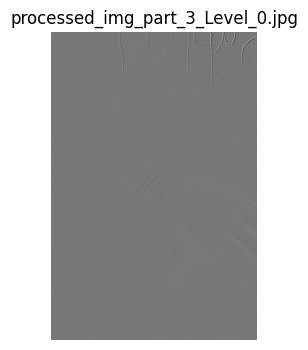

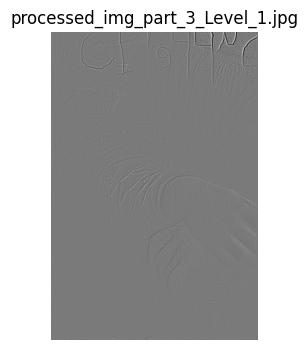

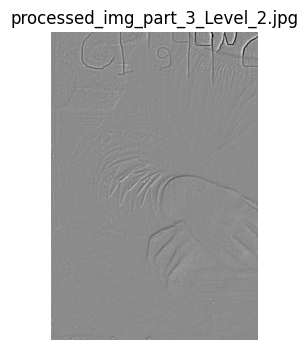

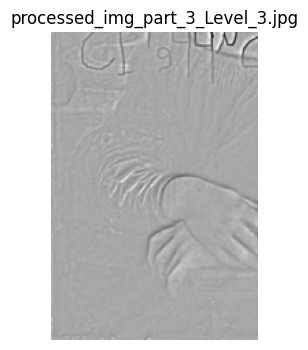

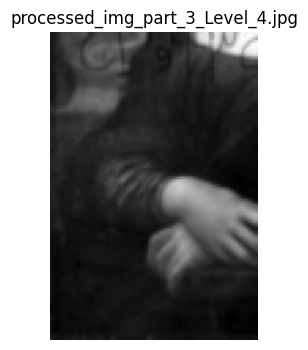

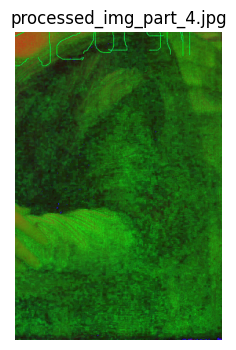

In [4]:
import cv2
import matplotlib.pyplot as plt

# لیست فایل‌ها
# لیست صحیح فایل‌ها با پسوند
image_files = [
    'processed_img_part_1.jpg',
    'processed_img_part_2.jpg',
    'processed_img_part_3_Level_0.jpg',
    'processed_img_part_3_Level_1.jpg',
    'processed_img_part_3_Level_2.jpg',
    'processed_img_part_3_Level_3.jpg',
    'processed_img_part_3_Level_4.jpg',
    'processed_img_part_4.jpg'
]


# تابع نمایش تصویر
def show_image(img_path, title):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # از BGR به RGB
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# نمایش همه تصاویر
for file in image_files:
    show_image(os.path.join(image_dir, file), file)


## مرحله ۳: فیلتر کردن نویز قطعه اول

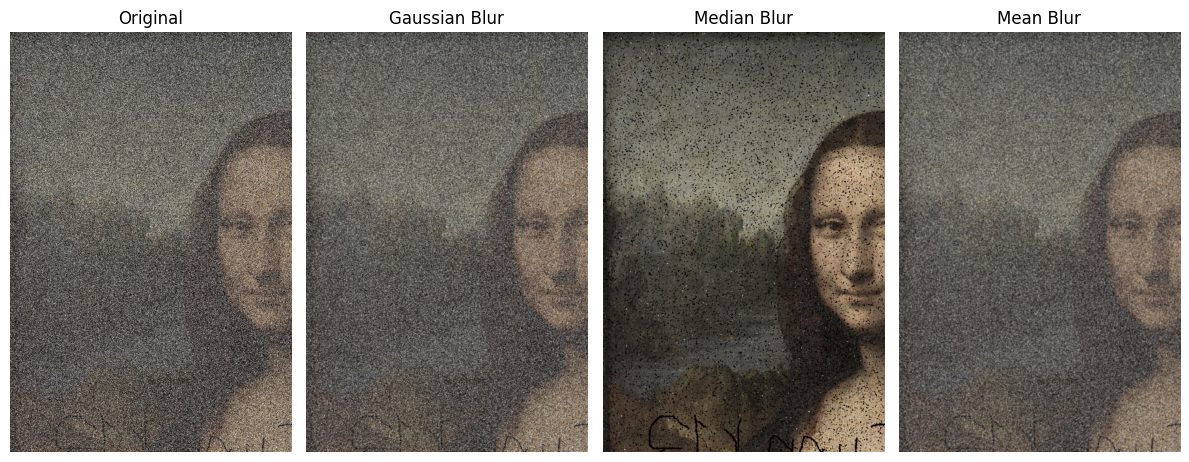

In [47]:
# بارگذاری تصویر 1
img1_path = os.path.join(image_dir, 'processed_img_part_1.jpg')
img1 = cv2.imread(img1_path, cv2.IMREAD_COLOR)

# اعمال فیلترها
blur_gaussian = cv2.GaussianBlur(img1, (5, 5), 0)
blur_median = cv2.medianBlur(img1, 5)
blur_mean = cv2.blur(img1, (5, 5))

# نمایش نتایج
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(blur_gaussian, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(blur_median, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(blur_mean, cv2.COLOR_BGR2RGB))
plt.title("Mean Blur")
plt.axis('off')

plt.tight_layout()
plt.show()


In [48]:
# مسیر ذخیره نسخه‌ی پاک شده
output_path_img1 = os.path.join(image_dir, 'img_part_1.jpg')

# ذخیره تصویر
cv2.imwrite(output_path_img1, blur_median)
print("تصویر قطعه 1 با موفقیت ذخیره شد.")


تصویر قطعه 1 با موفقیت ذخیره شد.


## مرحله ۴: پاکسازی نویز از قطعه دوم با استفاده از حوزه فرکانس (Fourier Transform)

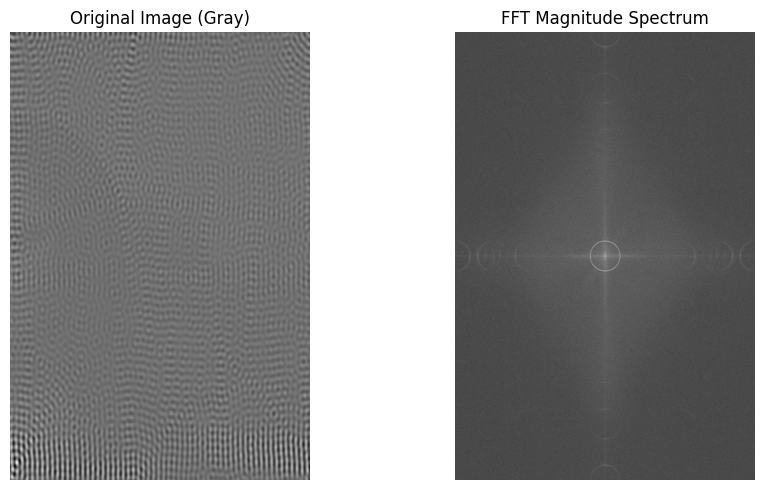

In [5]:
import numpy as np

# بارگذاری تصویر دوم
img2_path = os.path.join(image_dir, 'processed_img_part_2.jpg')
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)  # برای FFT بهتره سیاه‌وسفید باشه

# اعمال FFT
f = np.fft.fft2(img2)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

# نمایش تصویر اصلی و طیف فرکانسی
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title("Original Image (Gray)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("FFT Magnitude Spectrum")
plt.axis('off')

plt.tight_layout()
plt.show()


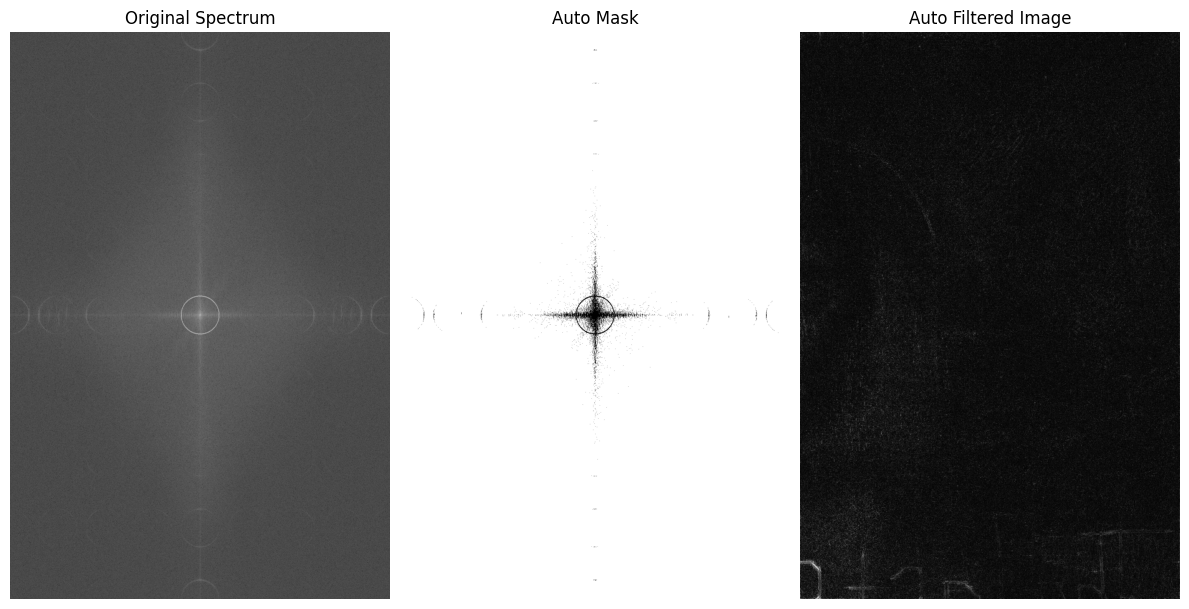

In [6]:
# مرحله ۱: ساخت ماسک خودکار با آستانه روشنایی
magnitude = np.abs(fshift)
threshold = np.percentile(magnitude, 99.5)  # فقط 0.5٪ روشن‌ترین نقاط حذف میشن

# ساخت ماسک
auto_mask = (magnitude < threshold).astype(np.uint8)

# مرحله ۲: اعمال ماسک روی طیف
fshift_auto_filtered = fshift * auto_mask

# مرحله ۳: تبدیل معکوس
f_ishift = np.fft.ifftshift(fshift_auto_filtered)
img_auto_filtered = np.fft.ifft2(f_ishift)
img_auto_filtered = np.abs(img_auto_filtered)

# نمایش نتایج
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Original Spectrum")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(auto_mask * 255, cmap='gray')
plt.title("Auto Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_auto_filtered, cmap='gray')
plt.title("Auto Filtered Image")
plt.axis('off')

plt.tight_layout()
plt.show()


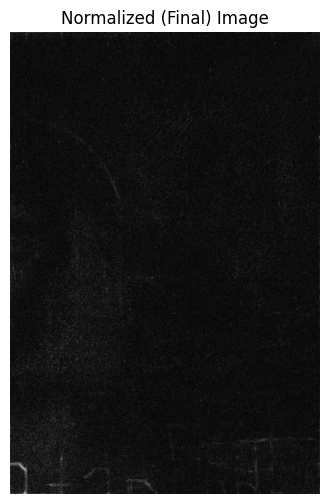

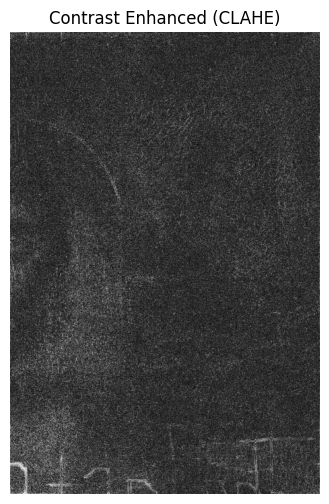

In [7]:
# نرمال‌سازی به بازه 0 تا 255 و تبدیل به uint8
img_auto_normalized = cv2.normalize(img_auto_filtered, None, 0, 255, cv2.NORM_MINMAX)
img_auto_normalized = np.uint8(img_auto_normalized)

# نمایش نهایی
plt.figure(figsize=(6, 6))
plt.imshow(img_auto_normalized, cmap='gray')
plt.title("Normalized (Final) Image")
plt.axis('off')
plt.show()
# استفاده از CLAHE برای افزایش نواحی روشن
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
img_clahe = clahe.apply(img_auto_normalized)

# نمایش نهایی
plt.figure(figsize=(6, 6))
plt.imshow(img_clahe, cmap='gray')
plt.title("Contrast Enhanced (CLAHE)")
plt.axis('off')
plt.show()


In [52]:
output_path_img2 = os.path.join(image_dir, 'img_part_2.jpg')
cv2.imwrite(output_path_img2, img_clahe)
print("تصویر قطعه ۲ با موفقیت ذخیره شد.")


تصویر قطعه ۲ با موفقیت ذخیره شد.


## مرحله ۵: بازسازی قطعه سوم (5 قطعه کوچک به یک تصویر کامل)

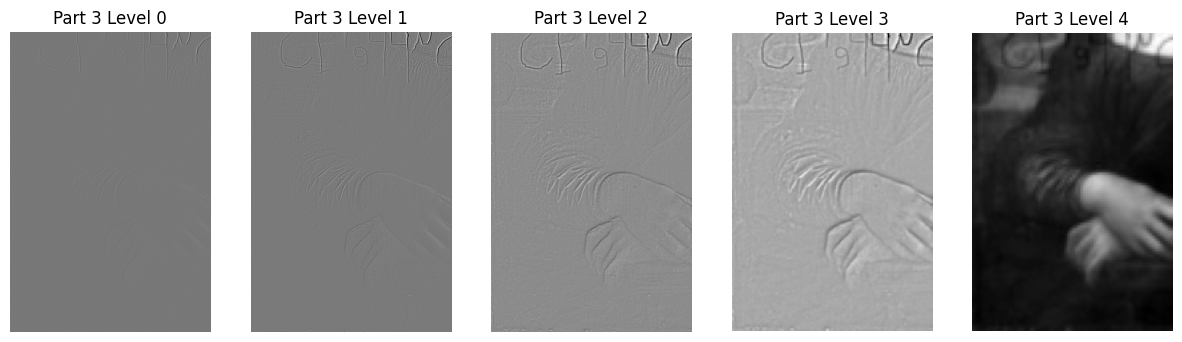

In [10]:
# اسامی فایل‌های قطعه 3 سطوح 0 تا 4
part3_files = [
    'processed_img_part_3_Level_0.jpg',
    'processed_img_part_3_Level_1.jpg',
    'processed_img_part_3_Level_2.jpg',
    'processed_img_part_3_Level_3.jpg',
    'processed_img_part_3_Level_4.jpg'
]

# بارگذاری تصاویر
part3_images = [cv2.imread(os.path.join(image_dir, f)) for f in part3_files]

# نمایش همه تصاویر کوچک
plt.figure(figsize=(15, 5))
for i, img in enumerate(part3_images):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Part 3 Level {i}')
    plt.axis('off')
plt.show()


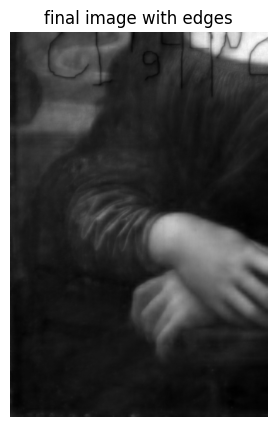

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# بررسی ابعاد تصاویر و تغییر اندازه به یکسان
target_shape = (1796, 1201)  # ابعاد مورد نظر
resized_images = [cv2.resize(img, (target_shape[1], target_shape[0])) for img in part3_images]

# تصویر پایه (بدون لبه - Level 4)
base_image = resized_images[-1].astype(np.float32)

# افزودن لبه‌های سطوح مختلف به تصویر پایه
# وزن‌ها را می‌توانید تنظیم کنید (مثلاً 0.3 برای لبه‌های شارپ و کمتر برای لبه‌های نرم)
edge_weights = [0.05, 0.1, 0.2, 0.3]  # وزن برای Level 0 تا Level 3

for i in range(4):  # فقط 4 سطح اول (Level 0 تا Level 3)
    base_image += edge_weights[i] * resized_images[i].astype(np.float32)

#نرمال‌سازی خطی ساده
final_image = base_image
final_image = final_image - final_image.min()
final_image = final_image / final_image.max() * 255
final_image = final_image.astype(np.uint8)

# نمایش تصویر نهایی
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title('final image with edges')
plt.axis('off')
plt.show()

In [51]:
output_path_img2 = os.path.join(image_dir, 'img_part_3.jpg')
cv2.imwrite(output_path_img2, final_image)
print("تصویر قطعه3 با موفقیت ذخیره شد.")

تصویر قطعه3 با موفقیت ذخیره شد.


## مرحله 6: پردازش قطعه ۴ (اصلاح رنگ به خاطر تغییرات شیمیایی)

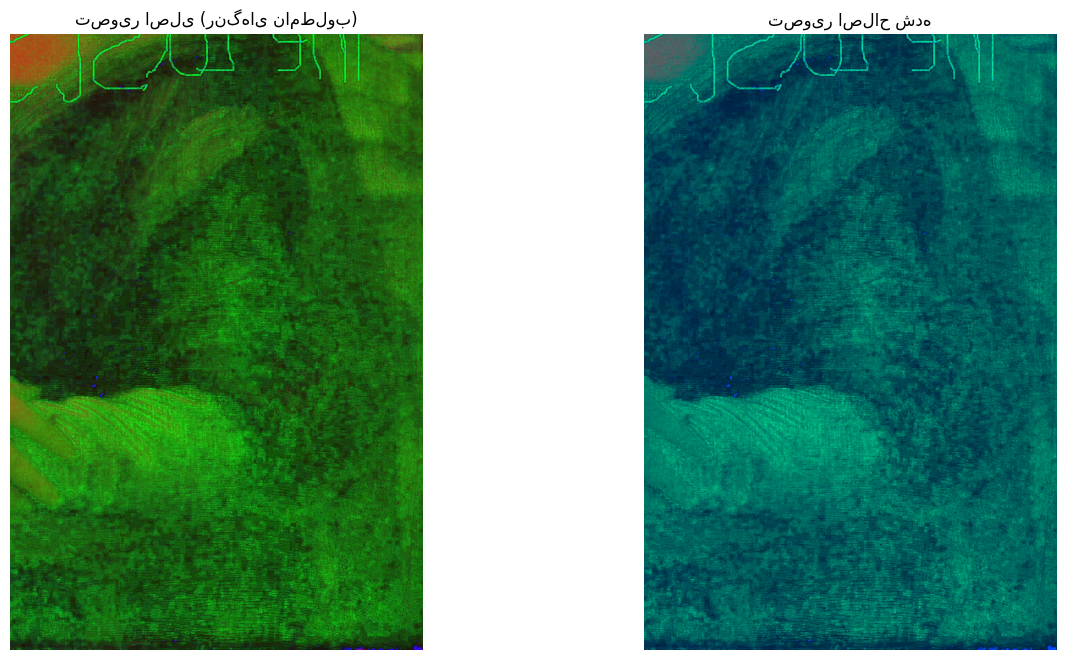

True

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. بارگذاری تصویر
img_path = os.path.join(image_dir, 'processed_img_part_4.jpg')
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. تبدیل به فضای LAB برای اصلاح بهتر رنگ
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

# 3. اصلاح کانال‌های رنگی (مقادیر را می‌توانید تنظیم کنید)
a = np.clip(a * 0.7 + 10, 0, 255).astype(np.uint8)  # کاهش سبز/افزایش قرمز
b = np.clip(b * 0.8 - 15, 0, 255).astype(np.uint8)  # کاهش زرد/آبی
l = np.clip(l * 0.9, 0, 255).astype(np.uint8)  # کاهش روشنایی کلی

# 4. ادغام کانال‌های اصلاح شده
corrected_lab = cv2.merge([l, a, b])
corrected_img = cv2.cvtColor(corrected_lab, cv2.COLOR_LAB2RGB)

# 5. نمایش نتایج
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('تصویر اصلی (رنگ‌های نامطلوب)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(corrected_img)
plt.title('تصویر اصلاح شده')
plt.axis('off')
plt.show()

# 6. ذخیره تصویر اصلاح شده
output_path = os.path.join(image_dir, 'restored_monalisa.jpg')
cv2.imwrite(output_path, cv2.cvtColor(corrected_img, cv2.COLOR_RGB2BGR))